First, get all packages that we might need and setup your notebook plotting to be inline.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pencil as pc

from matplotlib import animation, rc
from IPython.display import HTML

         pencil has moved to pencil_old.
To change your scripts accordingly:
import pencilnew as pc -> import pencil as pc
import pencil as pc -> import pencil_old as pc
$ conda install -c plotly plotly-orca psutil requests


In [46]:
plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 16})

Get simulation objects and its extends, here I assume $N_x = N_y = N_z$

In [9]:
#pc.get_sim?

In [3]:
param = pc.read.param()

In [4]:
param.lxyz

[12.5664, 12.5664, 6.28319]

In [14]:
sim = pc.get_sim()

L = sim.param['lxyz'][0]
Nx = sim.dim.nx
Ny = sim.dim.ny
Nz = sim.dim.nz

In [15]:
Nx, Ny, Nz

(128, 128, 128)

Then, read in varlist to get all var files in a list, plus I get the number range of all files and estimate there simulation time via dsnap.

In [13]:
sim.get_value('isave')

100

In [16]:
varlist = sim.get_varlist()
Nvar = np.size(varlist)
var_range = np.array([int(var[3:]) for var in varlist])
var_range_simtime = np.array([sim.get_value('dsnap')*varNum for varNum in var_range])

In [41]:
#varlist, var_range

Now, lets read all the data we want to plot in >>one<< array:

In [17]:
print(Nvar)
a = np.zeros((Nvar, Nx, Nx))
b = np.zeros((Nvar, Nx, Nx))
c = np.zeros((Nvar, Nx, Nx))
for ii,var in zip(var_range, varlist):
    VAR = pc.read.var(sim=sim, magic=["bb"], trimall=True, quiet=True, var_file=var)
    a[ii] = VAR.bb[0,20,:,:]
    b[ii] = VAR.bb[0,:,20,:]
    c[ii] = VAR.bb[0,:,:,20]

65


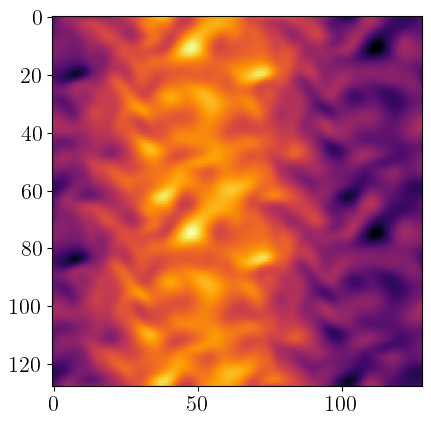

In [47]:
plt.imshow(a[60], cmap="inferno")
plt.show()

Create a figure and use imshow to plot your data. Make sure to use animated=True to get animation capability and use extent to set physically meaningfull plot ranges.

The function updatefig then updates the plot with a new snapshot by iterating the index ii.

Use intgervall to specify the ms for each frame and frames to specify the number of frames to be plotted.

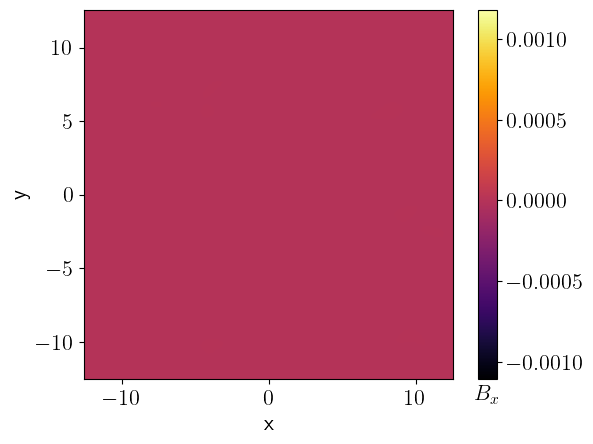

In [48]:
fig, ax = plt.subplots()

ii = 0
im = ax.imshow(a[0], animated=True, extent=[-L, L, -L, L], cmap='inferno')

def updatefig(*args):
    global ii
    ii += 1
    if ii >= Nvar: 
        return im,
    im.set_array(a[ii])
    return im,

plt.xlabel('x')
plt.ylabel('y')
fig.colorbar(ax.images[0], ax=ax)
fig.axes[1].set(xlabel=r'$B_x$')
ani = animation.FuncAnimation(fig, updatefig, interval=100, frames=Nvar-1)

Last step: lets have a look on the video.

In [49]:
HTML(ani.to_html5_video())

And maybe we want to save it.

In [57]:
mywriter = animation.FFMpegWriter(fps=10)
ani.save('tmp.mp4', writer=mywriter)# FIXME: this is not working.

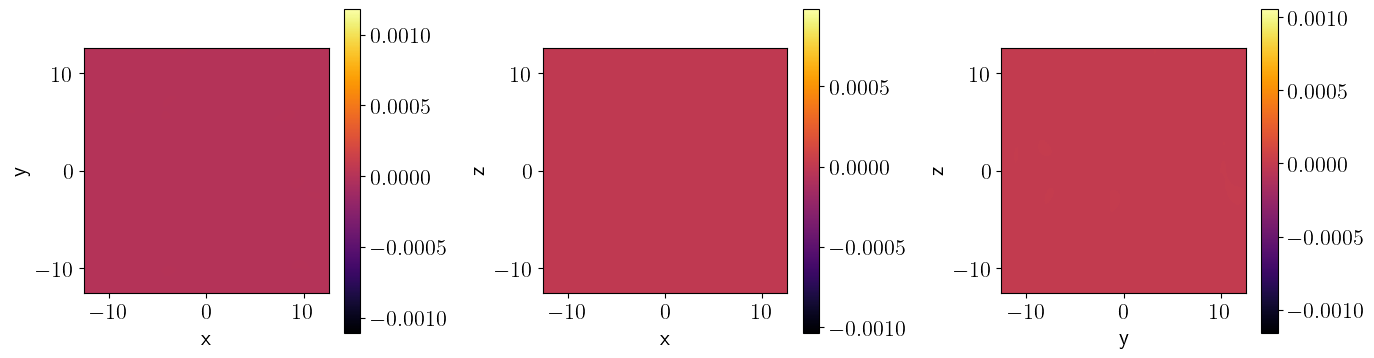

In [55]:
fig, ax = plt.subplots(1,3, figsize=(14,4))

ii = 0
im_a = ax[0].imshow(a[0], animated=True, extent=[-L, L, -L, L], cmap='inferno')
im_b = ax[1].imshow(b[0], animated=True, extent=[-L, L, -L, L], cmap='inferno')
im_c = ax[2].imshow(c[0], animated=True, extent=[-L, L, -L, L], cmap='inferno')

def updatefig(*args):
    global ii
    ii += 1
    if ii >= Nvar: 
        return im_a, im_b, im_c
    im_a.set_array(a[ii])
    im_b.set_array(b[ii])
    im_c.set_array(c[ii])
    return im_a, im_b, im_c

ax[0].set_xlabel("x")
ax[0].set_ylabel("y")
ax[1].set_xlabel("x")
ax[1].set_ylabel("z")
ax[2].set_xlabel("y")
ax[2].set_ylabel("z")

plt.colorbar(im_a, ax=ax[0])
plt.colorbar(im_b, ax=ax[1])
plt.colorbar(im_c, ax=ax[2])
plt.tight_layout()

ani3 = animation.FuncAnimation(fig, updatefig, interval=100, frames=Nvar-1)

In [56]:
HTML(ani3.to_html5_video())